# Web Scraping

In [ ]:
#importing libraries for scraping
import requests
from bs4 import BeautifulSoup
import html5lib
import re
import os
import numpy as np

In [ ]:
#scraping the lyrics weblinks, song and artist
URL="https://www.lyricsmode.com"
r=requests.get(URL)
soup=BeautifulSoup(r.content,'html.parser')
res=soup.find_all('a',attrs={'class':'modern-feed-header hide_text'})
song_links=[]
X=[]
for a in res:
    song_links.append(URL+a['href'])
    X.append(a.span.text)

In [ ]:
#creating an empty dataframe for lyrics data
import pandas as pd
df=pd.DataFrame()

In [ ]:
#song data
X

['Billie Eilish – Your Power',
 'twenty one pilots – Choker',
 'Doja Cat – Kiss Me More',
 'Lil Nas X – MONTERO (Call Me By Your Name)',
 'Billie Eilish – Lo Vas A Olvidar',
 'Lana Del Rey – Chemtrails Over The Country Club',
 'Olivia Rodrigo – Drivers License',
 'Justin Bieber – Anyone',
 'Ed Sheeran – Afterglow',
 'Taylor Swift – Tolerate It',
 'Taylor Swift – Willow',
 'twenty one pilots – Christmas Saves The Year',
 'Shawn Mendes – Wonder',
 'Billie Eilish – Therefore I Am',
 'System Of A Down – Protect The Land',
 'Ariana Grande – \u200bPositions',
 'Machine Gun Kelly – Body Bag',
 'Justin Bieber – Holy',
 'Bring Me The Horizon – Obey',
 'Travis Scott – The Plan',
 'Pharrell Williams – Entrepreneur',
 'Deftones – Ohms',
 'Charlie Puth – \u200bHard On Yourself',
 'Drake – Laugh Now Cry Later',
 'Machine Gun Kelly – Concert For Aliens',
 'Troye Sivan – Rager Teenager!',
 'Sam Smith – My Oasis',
 'The Neighbourhood – Cherry Flavoured',
 'Dominic Fike – Cancel Me',
 "Ava Max – Who's L

In [ ]:
#scraping the lyrics and storing it in clean form
modified_lyrics=[]
for URL in song_links:
    r=requests.get(URL)
    soup=BeautifulSoup(r.content,'html.parser')
    res=soup.find_all('div',attrs={'id':'lyrics_text'})
    for div in res:
        lyrics=div.text
        #remove identifiers like chorus, verse, etc
        lyrics = re.sub(r'[\(\[].*?[\)\]]', '', lyrics)
        #remove empty lines
        lyrics = os.linesep.join([s for s in lyrics.splitlines() if s])
        modified_lyrics.append(lyrics)
modified_lyrics

["                            \r\nTry not to abuse your power\r\nI know we didn't choose to change\r\nYou might not wanna lose your power\r\nBut havin' it's so strange\r\nShe said you were a hero\r\nYou played the part\r\nBut you ruined her in a year\r\nDon't act like it was hard\r\nAnd you swear you didn't know \r\nNo wonder why you didn't ask\r\nShe was sleepin' in your clothes \r\nBut now she's got to get to class\r\nHow dare you?\r\nAnd how could you?\r\nWill you only feel bad when they find out?\r\nIf you could take it all back\r\nWould you?\r\nTry not to abuse your power\r\nI know we didn't choose to change\r\nYou might not wanna lose your power\r\nBut havin' it's so strange\r\nI thought that I was special\r\nYou made me feel\r\nLike it was my fault, you were the devil\r\nLost your appeal\r\nDoes it keep you in control? \r\nFor you to keep her in a cage?\r\nAnd you swear you didn't know \r\nYou said you thought she was your age\r\nHow dare you?\r\nAnd how could you?\r\nWill you o

In [ ]:
#extracting the song and artist from song data
title=[]
artist=[]
for i in X:
    y=i.split('–')
    title.append(y[1])
    artist.append(y[0])

In [ ]:
#creating a dataframe of songs
df['title']=title
df['artist']=artist
df['lyrics']=modified_lyrics
df

,title,artist,lyrics
0,Your Power,Billie Eilish,\r\nTry not to abu...
1,Choker,twenty one pilots,"Mm-mm, mm-mm, mm-mm\r\nMm-mm, mm-mm, mm-mm\r\n..."
2,Kiss Me More,Doja Cat,"\r\nWe hug and, ye..."
3,MONTERO (Call Me By Your Name),Lil Nas X,\r\nI caught it ba...
4,Lo Vas A Olvidar,Billie Eilish,\r\nDime si me ech...
...,...,...,...
195,JEKYLL & HIDE,Bishop Briggs,\r\nBorn in a time...
196,Ocean,Lady A,\r\nHow can someon...
197,You,James Arthur,"\r\nFighting, livi..."
198,Xela,Manchester Orchestra,\r\nI slowly start...


In [ ]:
#saving dataframe in local drive
df.to_csv('D:\\6th sem materials\\Web Mining\\DA\\songs.csv')

In [1]:
#reading dataframe of songs
import pandas as pd  
dt = pd.read_csv('D:\\6th sem materials\\Web Mining\\DA\\songs.csv')
dt

,Unnamed: 0,title,artist,lyrics
0,0,Your Power,Billie Eilish,\r\nTry not to abu...
1,1,Choker,twenty one pilots,"Mm-mm, mm-mm, mm-mm\r\nMm-mm, mm-mm, mm-mm\r\n..."
2,2,Kiss Me More,Doja Cat,"\r\nWe hug and, ye..."
3,3,MONTERO (Call Me By Your Name),Lil Nas X,\r\nI caught it ba...
4,4,Lo Vas A Olvidar,Billie Eilish,\r\nDime si me ech...
...,...,...,...,...
195,195,JEKYLL & HIDE,Bishop Briggs,\r\nBorn in a time...
196,196,Ocean,Lady A,\r\nHow can someon...
197,197,You,James Arthur,"\r\nFighting, livi..."
198,198,Xela,Manchester Orchestra,\r\nI slowly start...


# Checking Plagiarised Songs

In [2]:
import nltk

In [3]:
#removing '\r\n' from lyrics
dt['lyrics']=dt['lyrics'].str.replace("\r\n"," ")
dt.head(5)

,Unnamed: 0,title,artist,lyrics
0,0,Your Power,Billie Eilish,Try not to abuse ...
1,1,Choker,twenty one pilots,"Mm-mm, mm-mm, mm-mm Mm-mm, mm-mm, mm-mm I don'..."
2,2,Kiss Me More,Doja Cat,"We hug and, yes, ..."
3,3,MONTERO (Call Me By Your Name),Lil Nas X,I caught it bad y...
4,4,Lo Vas A Olvidar,Billie Eilish,Dime si me echas ...


In [4]:
#removing punctuation,numbers and special characters
dt['lyrics']=dt['lyrics'].str.replace("[^a-zA-Z#]"," ")
dt.head(5)

,Unnamed: 0,title,artist,lyrics
0,0,Your Power,Billie Eilish,Try not to abuse ...
1,1,Choker,twenty one pilots,Mm mm mm mm mm mm Mm mm mm mm mm mm I don ...
2,2,Kiss Me More,Doja Cat,We hug and yes ...
3,3,MONTERO (Call Me By Your Name),Lil Nas X,I caught it bad y...
4,4,Lo Vas A Olvidar,Billie Eilish,Dime si me echas ...


In [5]:
#converting to lower case
dt['lyrics']=dt['lyrics'].str.lower()
dt.head(5)

,Unnamed: 0,title,artist,lyrics
0,0,Your Power,Billie Eilish,try not to abuse ...
1,1,Choker,twenty one pilots,mm mm mm mm mm mm mm mm mm mm mm mm i don ...
2,2,Kiss Me More,Doja Cat,we hug and yes ...
3,3,MONTERO (Call Me By Your Name),Lil Nas X,i caught it bad y...
4,4,Lo Vas A Olvidar,Billie Eilish,dime si me echas ...


In [6]:
#Removing stop words and tokenizing the text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
dt['lyrics']=dt['lyrics'].astype(str)
s=dt['lyrics']
stop_words1=stopwords.words('english')
stop_words2=stopwords.words('spanish')
filtered_lyrics=[]
for text in s:
    word_tokens=word_tokenize(text)
    word_tokens
    filtered_sentence=[w for w in word_tokens if not w in stop_words1 and not w in stop_words2]
    filtered_lyrics.append(filtered_sentence)
filtered_lyrics

[['try',
  'abuse',
  'power',
  'know',
  'choose',
  'change',
  'might',
  'wan',
  'na',
  'lose',
  'power',
  'havin',
  'strange',
  'said',
  'hero',
  'played',
  'part',
  'ruined',
  'year',
  'act',
  'like',
  'hard',
  'swear',
  'know',
  'wonder',
  'ask',
  'sleepin',
  'clothes',
  'got',
  'get',
  'class',
  'dare',
  'could',
  'feel',
  'bad',
  'find',
  'could',
  'take',
  'back',
  'would',
  'try',
  'abuse',
  'power',
  'know',
  'choose',
  'change',
  'might',
  'wan',
  'na',
  'lose',
  'power',
  'havin',
  'strange',
  'thought',
  'special',
  'made',
  'feel',
  'like',
  'fault',
  'devil',
  'lost',
  'appeal',
  'keep',
  'control',
  'keep',
  'cage',
  'swear',
  'know',
  'said',
  'thought',
  'age',
  'dare',
  'could',
  'feel',
  'bad',
  'turns',
  'kill',
  'contract',
  'would',
  'try',
  'abuse',
  'power',
  'know',
  'choose',
  'change',
  'might',
  'wan',
  'na',
  'lose',
  'power',
  'power',
  'pain',
  'mmm',
  'ooh',
  'hmm'

In [7]:
#Stemming the lyrics by removing the suffixes
from nltk import PorterStemmer
ps=PorterStemmer()
stemmed_lyrics=[]
for text in filtered_lyrics:
    L=[]
    for w in text:
        L.append(ps.stem(w))
    stemmed_lyrics.append(L)
stemmed_lyrics

[['tri',
  'abus',
  'power',
  'know',
  'choos',
  'chang',
  'might',
  'wan',
  'na',
  'lose',
  'power',
  'havin',
  'strang',
  'said',
  'hero',
  'play',
  'part',
  'ruin',
  'year',
  'act',
  'like',
  'hard',
  'swear',
  'know',
  'wonder',
  'ask',
  'sleepin',
  'cloth',
  'got',
  'get',
  'class',
  'dare',
  'could',
  'feel',
  'bad',
  'find',
  'could',
  'take',
  'back',
  'would',
  'tri',
  'abus',
  'power',
  'know',
  'choos',
  'chang',
  'might',
  'wan',
  'na',
  'lose',
  'power',
  'havin',
  'strang',
  'thought',
  'special',
  'made',
  'feel',
  'like',
  'fault',
  'devil',
  'lost',
  'appeal',
  'keep',
  'control',
  'keep',
  'cage',
  'swear',
  'know',
  'said',
  'thought',
  'age',
  'dare',
  'could',
  'feel',
  'bad',
  'turn',
  'kill',
  'contract',
  'would',
  'tri',
  'abus',
  'power',
  'know',
  'choos',
  'chang',
  'might',
  'wan',
  'na',
  'lose',
  'power',
  'power',
  'pain',
  'mmm',
  'ooh',
  'hmm',
  'explain',
  '

In [8]:
#creating a column of cleaned lyrics
clean=[]
for text in stemmed_lyrics:
    st=""
    for w in text:
        st=st+w+" "
    clean.append(st)
#stemmed_reviews
dt['Cleaned lyrics']=[rev for rev in clean]
dt.head(5)

,Unnamed: 0,title,artist,lyrics,Cleaned lyrics
0,0,Your Power,Billie Eilish,try not to abuse ...,tri abus power know choos chang might wan na l...
1,1,Choker,twenty one pilots,mm mm mm mm mm mm mm mm mm mm mm mm i don ...,mm mm mm mm mm mm mm mm mm mm mm mm bother any...
2,2,Kiss Me More,Doja Cat,we hug and yes ...,hug ye make love alway say goodnight cuddl sur...
3,3,MONTERO (Call Me By Your Name),Lil Nas X,i caught it bad y...,caught bad yesterday hit call place anyway hop...
4,4,Lo Vas A Olvidar,Billie Eilish,dime si me echas ...,dime si echa meno n dime si perdona n qu har v...


In [9]:
#Converting lyrics to tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(dt['Cleaned lyrics'])
X1=pd.DataFrame.sparse.from_spmatrix(X)

In [10]:
#Model 1 - kmeans with knn
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [11]:
#reducing dimensionality of TFIDF matrix
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal

,0,1,2,3,4
0,-0.031584,-0.029585,-0.004129,-0.015037,0.047188
1,-0.014147,-0.000531,0.002657,0.013057,-0.071251
2,0.033344,-0.062473,0.095025,0.102396,0.028739
3,0.067430,-0.029157,0.049878,-0.023896,0.058950
4,0.002346,-0.010652,0.026956,0.078450,-0.060546
...,...,...,...,...,...
195,-0.011500,0.045306,-0.053956,0.074718,-0.088397
196,-0.013869,0.025581,-0.112613,-0.123537,-0.001559
197,0.010038,-0.068582,0.047491,-0.131866,-0.026508
198,0.014289,-0.088840,0.048973,-0.082270,-0.015104


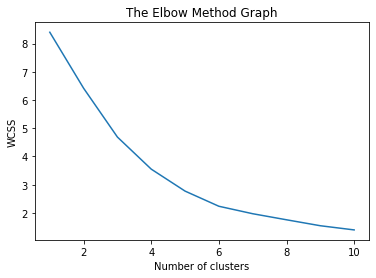

In [13]:
#checking optimal clusters for k-means
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
    kmeans.fit(X_principal)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
#training k-means algorithm
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X_principal)
y_kmeans

array([3, 0, 3, 3, 0, 3, 3, 0, 4, 3, 3, 0, 4, 0, 0, 0, 0, 3, 3, 3, 3, 4,
       3, 3, 0, 0, 0, 3, 3, 3, 3, 4, 0, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 0,
       0, 4, 3, 3, 3, 3, 0, 3, 4, 4, 0, 3, 0, 4, 3, 0, 3, 0, 3, 0, 3, 0,
       0, 4, 3, 3, 3, 4, 0, 0, 0, 0, 0, 4, 3, 4, 3, 4, 3, 4, 4, 4, 3, 3,
       4, 1, 0, 4, 4, 0, 0, 0, 0, 4, 0, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3,
       0, 3, 0, 0, 0, 4, 3, 3, 3, 4, 0, 3, 3, 0, 3, 0, 4, 0, 3, 0, 0, 0,
       1, 0, 4, 2, 3, 0, 4, 3, 3, 3, 4, 4, 3, 3, 3, 0, 3, 3, 4, 0, 4, 3,
       4, 4, 0, 4, 0, 4, 4, 3, 4, 3, 3, 4, 0, 0, 0, 3, 4, 3, 0, 4, 4, 0,
       4, 3, 0, 4, 4, 4, 0, 4, 0, 3, 0, 3, 4, 0, 0, 3, 4, 0, 3, 0, 4, 3,
       3, 4])

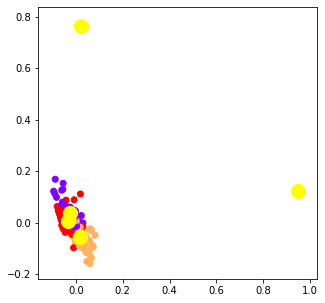

In [15]:
#plotting k-means results
plt.figure(figsize=(5, 5))
plt.scatter(X_principal.iloc[:, 0], X_principal.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label = 'Centroids')
plt.show()

In [16]:
#appending a column of cluster labels to dataframe
dt['kmeans_cluster']=y_kmeans.tolist()
dt

,Unnamed: 0,title,artist,lyrics,Cleaned lyrics,kmeans_cluster
0,0,Your Power,Billie Eilish,try not to abuse ...,tri abus power know choos chang might wan na l...,3
1,1,Choker,twenty one pilots,mm mm mm mm mm mm mm mm mm mm mm mm i don ...,mm mm mm mm mm mm mm mm mm mm mm mm bother any...,0
2,2,Kiss Me More,Doja Cat,we hug and yes ...,hug ye make love alway say goodnight cuddl sur...,3
3,3,MONTERO (Call Me By Your Name),Lil Nas X,i caught it bad y...,caught bad yesterday hit call place anyway hop...,3
4,4,Lo Vas A Olvidar,Billie Eilish,dime si me echas ...,dime si echa meno n dime si perdona n qu har v...,0
...,...,...,...,...,...,...
195,195,JEKYLL & HIDE,Bishop Briggs,born in a time of...,born time love face wind pain storm brew break...,0
196,196,Ocean,Lady A,how can someone s...,someon stand damn close feel like world away s...,4
197,197,You,James Arthur,fighting living ...,fight live die freedom men fought sinc time be...,3
198,198,Xela,Manchester Orchestra,i slowly start to...,slowli start bow hold fire bow differ point vi...,3


In [17]:
#user input to check plagiarised song
inp=X_principal.iloc[0,:]

In [18]:
#finding plagiarized songs based on nearest neighbours distance
from sklearn.neighbors import KNeighborsClassifier

k = 4

neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_principal,dt['kmeans_cluster'])


distances, indices = neigh.kneighbors([inp])

print(distances)
print(indices)

[[0.         0.02373564 0.0267405  0.03275355]]
[[  0  18  27 146]]


In [19]:
plagiarized_songs = []

for i in indices.ravel():
    plagiarized_songs.append([dt['title'][i],dt['artist'][i]])

In [20]:
print('Target song :',plagiarized_songs[0][0],'-',plagiarized_songs[0][1])
print('Plagiarized songs: ',plagiarized_songs[1:])

Target song :  Your Power - Billie Eilish 
Plagiarized songs:  [[' Obey', 'Bring Me The Horizon '], [' Cherry Flavoured', 'The Neighbourhood '], [' Christmas Tree Farm', 'Taylor Swift ']]


In [ ]:
#Model 2  - cosine similarity on song TFIDF vectors and using a random forest
vectors=X.toarray()

In [ ]:
#calculating cosine_similarity between two reviews
def cosine_sim_vectors(vec1,vec2):
    vec1=vec1.reshape(1,-1)
    vec2=vec2.reshape(1,-1)
    return cosine_similarity(vec1,vec2)[0][0]

In [ ]:
#calculating cosine similarity of all songs with target song
from sklearn.metrics.pairwise import cosine_similarity
csim_max=[]
for i in range(0,len(vectors)):
    csim_max.append(cosine_sim_vectors(vectors[0],vectors[i]))
csim_max

[1.0000000000000004,
 0.01847461306733097,
 0.07202039544564721,
 0.06775340511136042,
 0.00811902062473092,
 0.013021637840756545,
 0.05012815141377888,
 0.04187823873978592,
 0.03457251067193142,
 0.04921134982296987,
 0.04009654899426651,
 0.016366057570646422,
 0.08767261242593619,
 0.024920493542798725,
 0.0182186965693771,
 0.013692843089963843,
 0.010069763526494944,
 0.04673993298876792,
 0.05661844744245778,
 0.04832581883739746,
 0.003339498096542247,
 0.08369734778875292,
 0.10560488832810884,
 0.05371309885483894,
 0.019169952086914646,
 0.07452515067654841,
 0.02333411722347029,
 0.08246363822372355,
 0.013958448019355502,
 0.05323642014025509,
 0.0796856001904856,
 0.08273565873485497,
 0.03260511025901728,
 0.06229745923817289,
 0.07858880049692041,
 0.07950824195962235,
 0.059729110456249665,
 0.014510204357188933,
 0.024926295248929413,
 0.07794682081717437,
 0.015870575967926237,
 0.048817112521100436,
 0.031593366784337065,
 0.019969458950400632,
 0.05607876587120875

In [ ]:
#creating a dataframe of songs and cosine similarities
d_sim=pd.DataFrame()
d_sim['Song-Artist']=dt['title']+'-'+dt['artist']
d_sim["cos sim"]=csim_max

In [ ]:
#sorting by similarity (plagiarism)
rstdf=d_sim.sort_values(by="cos sim",ascending=False)
d1=rstdf.iloc[1:6,]
d1

,Song-Artist,cos sim
100,Don't Slack-Anderson .Paak,0.209282
159,Everything I Wanted-Billie Eilish,0.198139
60,The Bigger Picture-Lil Baby,0.151719
76,BELIEVE IT-PARTYNEXTDOOR,0.141506
101,Never Worn White-Katy Perry,0.130483


<BarContainer object of 5 artists>

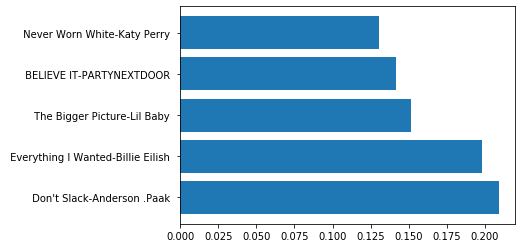

In [ ]:
#plotting plagiarized songs
plt.figure()
plt.barh(d1['Song-Artist'],d1['cos sim'])

In [ ]:
#setting a threshold plagiarism value
threshold=sum(rstdf['cos sim'])/rstdf.shape[0]
threshold

0.04994060880932254

In [ ]:
#taking a test instance to check if it is plagiarized with target song
test=X1.iloc[X1.shape[0]-1,:]

In [ ]:
#replace cosine values with 'plagiarized' or 'non-plagiarized' based on threshold
rstdf.loc[(rstdf['cos sim']>=threshold),'Label']='Plagiarized'
rstdf.loc[(rstdf['cos sim']<threshold),'Label']='Non-Plagiarized'
rstdf

,Song-Artist,cos sim,Label
0,Your Power-Billie Eilish,1.000000,Plagiarized
100,Don't Slack-Anderson .Paak,0.209282,Plagiarized
159,Everything I Wanted-Billie Eilish,0.198139,Plagiarized
60,The Bigger Picture-Lil Baby,0.151719,Plagiarized
76,BELIEVE IT-PARTYNEXTDOOR,0.141506,Plagiarized
...,...,...,...
20,Entrepreneur-Pharrell Williams,0.003339,Non-Plagiarized
137,The Coventry Carol-Christmas Songs,0.001165,Non-Plagiarized
187,Bittersweet Tragedy-Melanie Martinez,0.000353,Non-Plagiarized
178,Welcome Christmas-Dr. Seuss,0.000261,Non-Plagiarized


In [ ]:
#training a random forest ensemble
train_X=X1.iloc[0:X1.shape[0]-1,:]
train_y=rstdf['Label'][0:X1.shape[0]-1]
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = X1.shape[1]
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3926, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#predicting test instance label
print('Target song: ',dt['title'][0],'-',dt['artist'][0])
y_pred = model.predict([test])
print('Test song: ',dt['title'][dt.shape[0]-1],'-',dt['artist'][dt.shape[0]-1],'=>',list(y_pred))

Target song:   Your Power - Billie Eilish 
Test song:   Piano Joint (This Kind Of Love) - Michael Kiwanuka  => ['Non-Plagiarized']


# Generating lyrics for songs

In [ ]:
#Model 1 : n-gram model
#subsetting the lyrics text
songs=[]
for song in dt['Cleaned lyrics']:
    songs.append(song)
song_lyrics=[]
for lyric in songs:
    ans=lyric.split()
    song_lyrics.append(ans)
song_lyrics

[['tri',
  'abus',
  'power',
  'know',
  'choos',
  'chang',
  'might',
  'wan',
  'na',
  'lose',
  'power',
  'havin',
  'strang',
  'said',
  'hero',
  'play',
  'part',
  'ruin',
  'year',
  'act',
  'like',
  'hard',
  'swear',
  'know',
  'wonder',
  'ask',
  'sleepin',
  'cloth',
  'got',
  'get',
  'class',
  'dare',
  'could',
  'feel',
  'bad',
  'find',
  'could',
  'take',
  'back',
  'would',
  'tri',
  'abus',
  'power',
  'know',
  'choos',
  'chang',
  'might',
  'wan',
  'na',
  'lose',
  'power',
  'havin',
  'strang',
  'thought',
  'special',
  'made',
  'feel',
  'like',
  'fault',
  'devil',
  'lost',
  'appeal',
  'keep',
  'control',
  'keep',
  'cage',
  'swear',
  'know',
  'said',
  'thought',
  'age',
  'dare',
  'could',
  'feel',
  'bad',
  'turn',
  'kill',
  'contract',
  'would',
  'tri',
  'abus',
  'power',
  'know',
  'choos',
  'chang',
  'might',
  'wan',
  'na',
  'lose',
  'power',
  'power',
  'pain',
  'mmm',
  'ooh',
  'hmm',
  'explain',
  '

In [ ]:
from nltk import trigrams
from collections import defaultdict

language_model=defaultdict(lambda:defaultdict(lambda:0))

#estimating frequency count
for lyric in song_lyrics:
    for w1,w2,w3 in trigrams(lyric,pad_right=True,pad_left=True):
        language_model[(w1,w2)][w3] +=1
#getting probabilities
for w1_w2 in language_model:
    total=float(sum(language_model[w1_w2].values()))
    for w3 in language_model[w1_w2]:
        language_model[w1_w2][w3]/=total

In [ ]:
#checking probability for test bigram
dict(language_model['let','go'])

{'let': 0.06349206349206349,
 'va': 0.12698412698412698,
 'yeah': 0.015873015873015872,
 'hold': 0.047619047619047616,
 'want': 0.031746031746031744,
 'caus': 0.015873015873015872,
 'home': 0.015873015873015872,
 'oh': 0.07936507936507936,
 'one': 0.047619047619047616,
 'anyth': 0.015873015873015872,
 'better': 0.015873015873015872,
 'love': 0.015873015873015872,
 'type': 0.015873015873015872,
 'realli': 0.015873015873015872,
 'fall': 0.09523809523809523,
 'drive': 0.015873015873015872,
 'play': 0.015873015873015872,
 'would': 0.015873015873015872,
 'done': 0.031746031746031744,
 'nowher': 0.047619047619047616,
 'stay': 0.06349206349206349,
 'anonym': 0.015873015873015872,
 'possibl': 0.015873015873015872,
 'someday': 0.031746031746031744,
 'never': 0.015873015873015872,
 'take': 0.015873015873015872,
 'time': 0.015873015873015872,
 'like': 0.015873015873015872,
 'ice': 0.015873015873015872,
 'moment': 0.015873015873015872,
 'sad': 0.031746031746031744}

In [ ]:
#starting lyric input
start_lyrics=['keep','control']

In [ ]:
#generating lyrics for a fixed length
n_words=10
word_index=0
for i in range(n_words-2):
    prob_dict=dict(language_model[start_lyrics[word_index],start_lyrics[word_index+1]])
    if prob_dict:
        next_word=max(prob_dict,key=prob_dict.get)
    else:
        next_word=None
    start_lyrics.append(next_word)
    word_index +=1
start_lyrics

['keep',
 'control',
 'keep',
 'cage',
 'swear',
 'know',
 'wonder',
 'ask',
 'sleepin',
 'cloth']

In [ ]:
start_lyrics=['' if i==None else i for i in start_lyrics]
" ".join(start_lyrics)

'keep control keep cage swear know wonder ask sleepin cloth'

In [ ]:
#Model 2 - Text generation using LSTM
import keras
import numpy as np
import random
from keras.utils import np_utils

In [ ]:
#selecting lyrics of a target artist
d_artist=dt[dt['artist']==dt['artist'][0]]
d_artist

,Unnamed: 0,title,artist,lyrics,Cleaned lyrics
0,0,Your Power,Billie Eilish,try not to abuse ...,tri abus power know choos chang might wan na l...
4,4,Lo Vas A Olvidar,Billie Eilish,dime si me echas ...,dime si echa meno n dime si perdona n qu har v...
13,13,Therefore I Am,Billie Eilish,i m not your frie...,friend anyth damn think man think therefor fri...
31,31,My Future,Billie Eilish,i can t seem to f...,seem focu seem notic mirror check complexion f...
102,102,No Time To Die,Billie Eilish,i should have kno...,known leav alon goe show blood bleed blood owe...
159,159,Everything I Wanted,Billie Eilish,i had a dream i g...,dream got everyth want think bein honest might...


In [ ]:
#combining the lyrics into a single string
lyric_text=''
for lyric in d_artist['Cleaned lyrics']:
  lyric_text += lyric + ' '
lyric_text

'tri abus power know choos chang might wan na lose power havin strang said hero play part ruin year act like hard swear know wonder ask sleepin cloth got get class dare could feel bad find could take back would tri abus power know choos chang might wan na lose power havin strang thought special made feel like fault devil lost appeal keep control keep cage swear know said thought age dare could feel bad turn kill contract would tri abus power know choos chang might wan na lose power power pain mmm ooh hmm explain request  dime si echa meno n dime si perdona n qu har veneno na bueno dime si echa meno n va olvidar let go let go va olvidar let go va olvidar va olvidar let go let go va olvidar let go va olvidar good ah besito hahaha take care pleas dime arrepient n dime si n queda com n tiempo pierd vuelv dame beso b jame cru va olvidar let go let go va olvidar let go va olvidar va olvidar let go let go va olvidar let go va olvidar ay ay ay ay ay ah ah amor pued medirs paso firm dio puedo p

In [ ]:
#mapping vocabulary to unique numbers
vocab=sorted(list(set(lyric_text)))
vocab_to_int=dict((c,i) for i,c in enumerate(vocab))
n_input=len(lyric_text)
n_vocab=len(vocab)

In [ ]:
#creating input of character sequence patterns and output of next character
seq_length=100
inp=[]
out=[]
for i in range(0, n_input - seq_length, 1):
    in_seq = lyric_text[i:i + seq_length]
    out_seq = lyric_text[i + seq_length]
    inp.append([vocab_to_int[char] for char in in_seq])
    out.append(vocab_to_int[out_seq])
n_patterns=len(inp)
X = np.reshape(inp, (n_patterns, seq_length, 1))
X = X/float(n_vocab)
y=np_utils.to_categorical(out)

In [ ]:
#building the LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
#training the model
model.fit(X,y,epochs=100,batch_size=256)

Epoch 1/100
14/14 [==============================] - 48s 3s/step - loss: 0.2430
Epoch 2/100
14/14 [==============================] - 47s 3s/step - loss: 0.2235
Epoch 3/100
14/14 [==============================] - 47s 3s/step - loss: 0.2100
Epoch 4/100
14/14 [==============================] - 47s 3s/step - loss: 0.2159
Epoch 5/100
14/14 [==============================] - 48s 3s/step - loss: 0.2131
Epoch 6/100
14/14 [==============================] - 48s 3s/step - loss: 0.2036
Epoch 7/100
14/14 [==============================] - 48s 3s/step - loss: 0.2066
Epoch 8/100
14/14 [==============================] - 48s 3s/step - loss: 0.1858
Epoch 9/100
14/14 [==============================] - 47s 3s/step - loss: 0.1862
Epoch 10/100
14/14 [==============================] - 47s 3s/step - loss: 0.1822
Epoch 11/100
14/14 [==============================] - 47s 3s/step - loss: 0.1759
Epoch 12/100
14/14 [==============================] - 47s 3s/step - loss: 0.1736
Epoch 13/100
14/14 [=================

In [ ]:
#creating a random seed for test instance
int_to_char=dict((i,c) for i,c in enumerate(vocab))
start = np.random.randint(0, len(inp) - 1)
pattern = inp[start]
print("Random Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

Random Seed:
" n go hear comin home understand chang plan caus love futur wait meet love anybodi els wan na get kno "


In [ ]:
#generating the next characters in the lyrics
ans=[]
import sys
for i in range(1000):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    ans.append(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

In [ ]:
print(''.join(ans))

w know supposedli lone know suppos unhappi without someon someon like answer caus handsom know better drive home caus invit love futur know love anybodi see coupl year explain request  known leav alon goe show blood bleed blood owe pair saw much bear life life far away fair stupid love reckless help obviou everybodi els fallen lie never side fool fool twice death paradis never see cri time die explain request  dream got everyth want think bein honest might nightmar anyon might care thought could fli step golden mm nobodi cri nobodi even notic saw stand right kinda thought might care dream got everyth want wake see say long one hurt wan na lie learn could chang way see wonder deserv knew would would knew said would go straight head would say instead knew would would knew said would go straight head would say instead knew would would knew said would go straight head would say instead knew would would knew said would go straight head would say instead knew would would knew said would go s